In [1]:
# This notebook explores the results for the agent based model

In [2]:
import re
import json
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option( 'display.max_columns', None )
pd.set_option( 'display.max_rows', None )

# Loading localidades GeoJSON for reference

In [ ]:
localidades = gpd.read_file( './data/geo/bogotá/localidades_no_sumapaz.json' )

In [ ]:
del localidades[ 'geometry' ]

In [ ]:
localidades.head()

In [ ]:
locs = {}
for i, row in localidades.iterrows():
    locs[ str( row[ 'codigo_localidad' ] ) ] = row[ 'localidad' ]
locs

# Loading ABM results

In [4]:
city = 'cartagena'

In [5]:
filename = None
if city == 'bogota':
    filename = '70_smpl_gral_220_0_pb'
elif city == 'cartagena':
    filename = '70_smpl_gral_cartagena_220_0.9_0.2_per_zonif_man_True'
    
agents = pd.read_csv( './data/agents/{}.csv'.format( filename ) )

In [6]:
agents.shape

(160, 37)

In [7]:
agents.dtypes

Unnamed: 0                           int64
Susceptibles                         int64
Total infectados                     int64
Graves                               int64
Críticos                             int64
Leves                                int64
Recuperados                          int64
Rt                                 float64
Recuento_zonas                      object
0-9                                 object
10-19                               object
20-39                               object
40-59                               object
>60                                 object
En_cuarentena                       object
Restringido_movilidad               object
Vivos                                int64
Día                                  int64
Contactos_prom_trabajo             float64
Contactos_prom_transporte          float64
Contactos_prom_casa                float64
Contactos_prom_trabajo_conm        float64
Contactos_prom_transporte_conm     float64
Contactos_p

In [8]:
agents[ 'Fecha' ] = agents[ 'Día' ].apply( lambda x: pd.to_datetime( '03/06/2020' ) + pd.DateOffset( days = x ) )

In [9]:
agents.tail()

,Unnamed: 0,Susceptibles,Total infectados,Graves,Críticos,Leves,Recuperados,Rt,Recuento_zonas,0-9,10-19,20-39,40-59,>60,En_cuarentena,Restringido_movilidad,Vivos,Día,Contactos_prom_trabajo,Contactos_prom_transporte,Contactos_prom_casa,Contactos_prom_trabajo_conm,Contactos_prom_transporte_conm,Contactos_prom_casa_conm,Nuevos_infectados,Detectados,En_testing,En_cama,En_UCI,Detectados_por_intervencion,#Intervenidos,porcentaje_edad_activa_por_zona,porcentaje_edad_activa,tasa_letalidad_por_zona,tasa_letalidad,total_muertos,total_muertos_por_zona,Fecha
155,155,12238,309,9,2,298,9653,0.304207,"{'De la virgen y turistica': [3595, 0, 0, 57, ...","[3456, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 130, 0...","[3229, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 371, ...","[2296, 0, 0, 146, 4, 0, 1, 0, 1, 0, 0, 0, 4889...","[1588, 0, 0, 94, 5, 0, 0, 0, 0, 1, 0, 1, 3244,...","[1669, 0, 0, 47, 5, 0, 8, 0, 5, 1, 0, 1, 1019,...","[9447, 111, 2, 1, 3772]","[0, 0, 0, 0, 0]",22200,155,2.865315,1.662027,0.975090,7.173790,4.161159,2.441299,14,163,3,34,2,0,0,{'De la virgen y turistica': 0.006867064006219...,0.004954,{'De la virgen y turistica': 0.014084507042253...,0.018072,3,"{'De la virgen y turistica': 1, 'Industrial de...",2020-08-08
156,156,12215,307,9,2,296,9678,0.322476,"{'De la virgen y turistica': [3593, 0, 0, 58, ...","[3456, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 130, 0...","[3228, 0, 0, 12, 1, 0, 0, 0, 0, 0, 0, 0, 371, ...","[2288, 0, 0, 140, 10, 0, 1, 0, 1, 0, 0, 0, 490...","[1578, 0, 0, 95, 6, 0, 0, 0, 0, 1, 0, 1, 3253,...","[1665, 0, 0, 49, 5, 0, 8, 0, 7, 1, 0, 1, 1021,...","[9329, 95, 6, 0, 3671]","[0, 0, 0, 0, 0]",22200,156,2.998874,1.731486,1.004009,7.316738,4.224530,2.449610,22,165,1,34,2,0,0,{'De la virgen y turistica': 0.006867064006219...,0.004954,{'De la virgen y turistica': 0.014084507042253...,0.017857,3,"{'De la virgen y turistica': 1, 'Industrial de...",2020-08-09
157,157,12195,304,8,3,293,9701,0.345395,"{'De la virgen y turistica': [3588, 0, 0, 56, ...","[3456, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 130, 0...","[3227, 0, 0, 11, 1, 0, 0, 0, 0, 0, 0, 0, 373, ...","[2277, 0, 0, 139, 10, 0, 1, 0, 1, 0, 0, 0, 491...","[1572, 0, 0, 93, 9, 0, 1, 0, 0, 1, 0, 1, 3260,...","[1663, 0, 0, 50, 2, 0, 6, 0, 5, 2, 0, 2, 1023,...","[9611, 102, 4, 0, 4344]","[0, 0, 0, 0, 0]",22200,157,2.384595,1.397883,0.860270,6.504239,3.812876,2.346480,22,165,2,34,2,0,0,{'De la virgen y turistica': 0.006867064006219...,0.004954,{'De la virgen y turistica': 0.014084507042253...,0.017857,3,"{'De la virgen y turistica': 1, 'Industrial de...",2020-08-10
158,158,12184,286,8,3,275,9730,0.304196,"{'De la virgen y turistica': [3586, 0, 0, 56, ...","[3456, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 130, 0...","[3227, 0, 0, 11, 1, 0, 0, 0, 0, 0, 0, 0, 373, ...","[2270, 0, 0, 130, 10, 0, 1, 0, 1, 0, 0, 0, 493...","[1569, 0, 0, 87, 5, 0, 1, 0, 0, 1, 0, 1, 3269,...","[1662, 0, 0, 47, 2, 0, 6, 0, 6, 2, 0, 2, 1027,...","[9892, 120, 5, 1, 4876]","[0, 0, 0, 0, 0]",22200,158,1.992703,1.154279,0.748378,6.055023,3.507391,2.274021,18,166,1,34,2,0,0,{'De la virgen y turistica': 0.006867064006219...,0.004954,{'De la virgen y turistica': 0.014084507042253...,0.017751,3,"{'De la virgen y turistica': 1, 'Industrial de...",2020-08-11
159,159,12176,274,9,2,263,9750,0.262774,"{'De la virgen y turistica': [3586, 0, 0, 51, ...","[3456, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 130, 0...","[3226, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 374, ...","[2267, 0, 0, 123, 5, 0, 1, 0, 1, 0, 0, 0, 4941...","[1568, 0, 0, 82, 3, 0, 2, 0, 0, 1, 0, 1, 3274,...","[1659, 0, 0, 47, 2, 0, 6, 0, 6, 1, 0, 1, 1031,...","[10342, 147, 8, 1, 5869]","[0, 0, 0, 0, 0]",22200,159,1.298784,0.753739,0.540360,4.943082,2.868678,2.056575,10,166,2,34,2,0,0,{'De la virgen y turistica': 0.006867064006219...,0.004954,{'De la virgen y turistica': 0.014084507042253...,0.017751,3,"{'De la virgen y turistica': 1, 'Industrial de...",2020-08-12


In [10]:
total_people = agents[ 'Vivos' ].values[ 0 ]

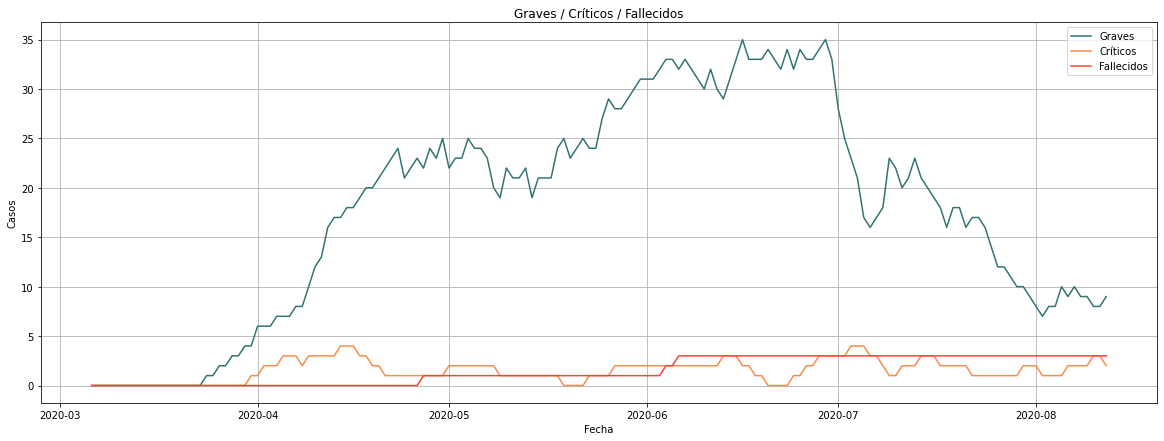

In [11]:
plt.figure( figsize = ( 20, 7 ) )
plt.plot( agents[ 'Fecha' ], agents[ 'Graves' ], label = 'Graves', color = '#317372' )
plt.plot( agents[ 'Fecha' ], agents[ 'Críticos' ], label = 'Críticos', color = '#f98a4b' )
plt.plot( agents[ 'Fecha' ], ( total_people - agents[ 'Vivos' ] ), label = 'Fallecidos', color = '#f64438' )
plt.title( 'Graves / Críticos / Fallecidos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Casos' )
plt.grid( True )
plt.legend()

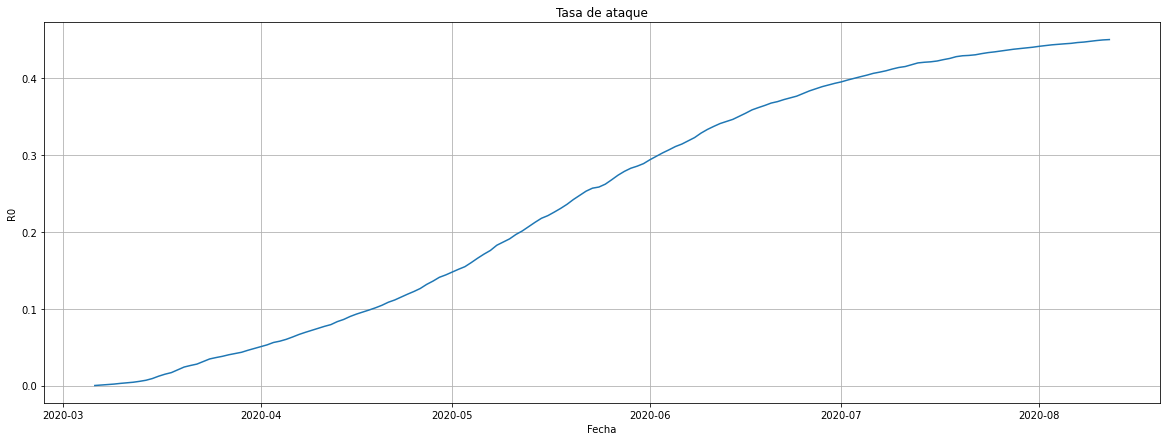

In [12]:
plt.figure( figsize = ( 20, 7 ) )
plt.plot( agents[ 'Fecha' ], ( agents[ 'Nuevos_infectados' ].cumsum() / total_people ) )
plt.xlabel( 'Fecha' )
plt.ylabel( 'R0' )
plt.title( 'Tasa de ataque' )
plt.grid( True )

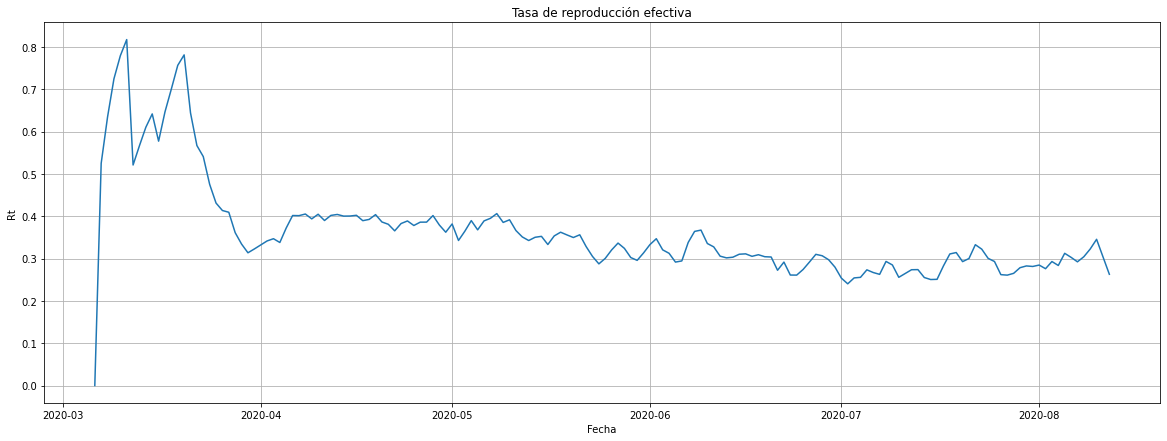

In [13]:
plt.figure( figsize = ( 20, 7 ) )
plt.plot( agents[ 'Fecha' ], agents[ 'Rt' ] )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Rt' )
plt.title( 'Tasa de reproducción efectiva' )
plt.grid( True )

In [14]:
def sum_quarantine( x ):
    x = json.loads( x )
    people_in_q = x[ 0 ] + x[ 1 ] + x[ 2 ] + x[ 3 ] + x[ 4 ]
    return people_in_q / total_people

agents[ 'Cuarentena' ] = agents[ 'En_cuarentena' ].apply( sum_quarantine )

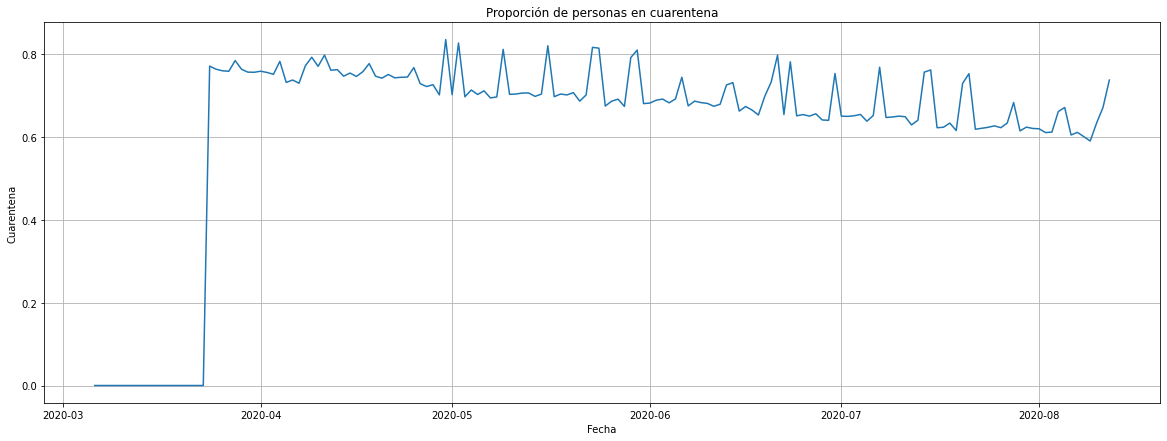

In [15]:
plt.figure( figsize = ( 20, 7 ) )
plt.plot( agents[ 'Fecha' ], agents[ 'Cuarentena' ] )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Cuarentena' )
plt.title( 'Proporción de personas en cuarentena' )
plt.grid( True )

In [16]:
agents[ 'Fallecidos' ] = ( total_people - agents[ 'Vivos' ] ) / total_people
agents[ 'R0' ] = ( agents[ 'Nuevos_infectados' ].cumsum() / total_people )

In [17]:
agents[ 'Críticos' ] = agents[ 'Críticos' ] / total_people
agents[ 'Graves' ] = agents[ 'Graves' ] / total_people

In [18]:
agents[ [ 'Fecha', 'R0', 'Rt', 'Cuarentena' ] ].to_csv( './agents-viz/data/{}-agents.csv'.format( city ), index = False )

In [19]:
pd.melt( agents[ [ 'Fecha', 'Graves', 'Críticos', 'Fallecidos', 'Cuarentena' ] ], id_vars = [ 'Fecha' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] ).to_csv( './agents-viz/data/{}-agents2.csv'.format( city ), index = False )

# By localidades

In [20]:
recuento_zonas = { 0: 'Susceptibles', 1: '?_1', 2: '?_2', 3: 'Leves', 4: '?_4', 5: '?_5', 6: 'Graves', 7: '?_7', 8: '?_8', 9: 'Críticos', 10: '?_10', 11: '?_11', 12: 'Recuperados', 13: '?_13', 14: '?_14'  }

In [27]:
def expand_by_loc( x ):
    replacer = re.compile("(\d+)")
    x[ 'Recuento_zonas' ] = replacer.sub( r'"\1"', x[ 'Recuento_zonas' ] )
    if city == 'cartagena':
        x[ 'Recuento_zonas' ] = x[ 'Recuento_zonas' ].replace( "'", '"' )
    #print( x[ 'Recuento_zonas' ] )
    x[ 'Recuento_zonas' ] = json.loads( x[ 'Recuento_zonas' ] )
    ds = []
    for z in x[ 'Recuento_zonas' ].keys():
        d = dict()
        if city == 'bogota':
            d[ 'Localidad' ] = locs[ z ]
        else:
            d[ 'Localidad' ] = z
        d[ 'Día' ] = row[ 'Día' ]
        for i in recuento_zonas.keys():
            d[ recuento_zonas[ i ] ] = int( x[ 'Recuento_zonas' ][ z ][ i ] )
        ds.append( d )
    return ds

all_locs = []
for i, row in agents.iterrows():
    all_locs = all_locs + expand_by_loc( row )

all_locs = pd.DataFrame( all_locs )

In [28]:
all_locs[ 'Fecha' ] = all_locs[ 'Día' ].apply( lambda x: pd.to_datetime( '03/06/2020' ) + pd.DateOffset( days = x ) )

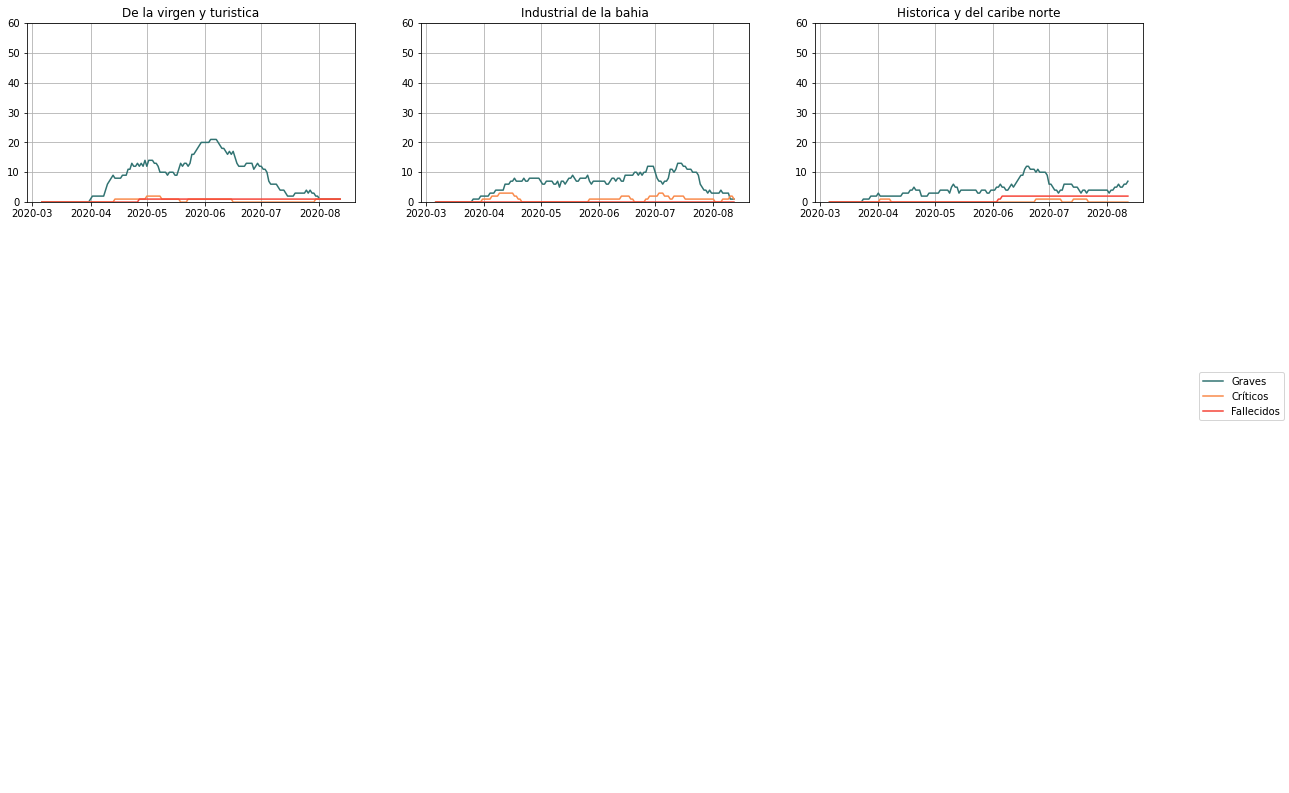

In [29]:
locs = list( all_locs[ 'Localidad' ].unique() )

fig = plt.figure( figsize = ( 20, 27 ) )

for i in range( 1, len( locs ) + 1 ):
    current_loc = all_locs[ all_locs[ 'Localidad' ] == locs[ i - 1 ] ]
    pop = ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ).values[ 0 ]
    plt.subplot( 7, 3, i )
    plt.plot( current_loc[ 'Fecha' ], current_loc[ 'Graves' ], label = 'Graves', color = '#317372' )
    plt.plot( current_loc[ 'Fecha' ], current_loc[ 'Críticos' ], label = 'Críticos', color = '#f98a4b' )
    plt.plot( current_loc[ 'Fecha' ], ( pop - ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ) ), label = 'Fallecidos', color = '#f64438' )
    plt.title( locs[ i - 1 ] )
    plt.ylim( [ 0, 60 ] )
    plt.grid( True )

fig.legend( labels = [ 'Graves', 'Críticos', 'Fallecidos' ], loc = 'center right' )

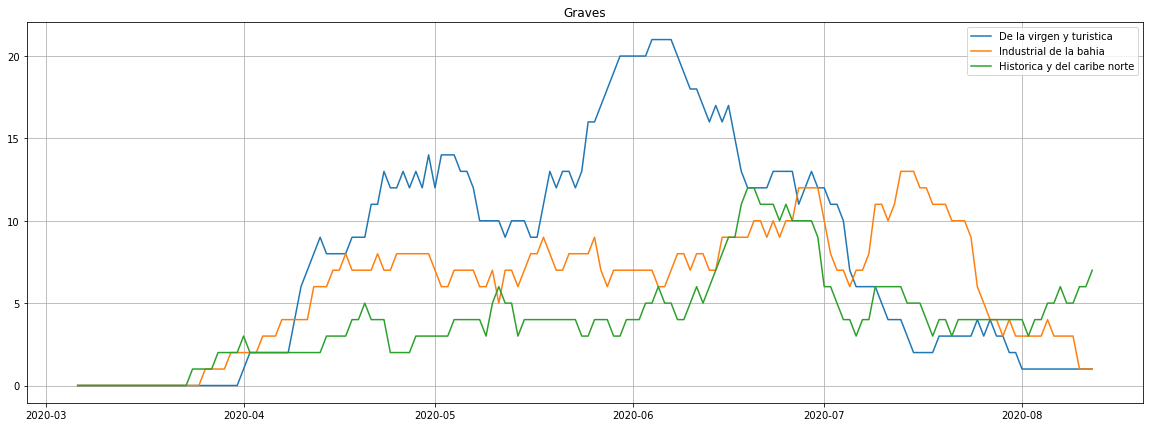

In [30]:
locs = list( all_locs[ 'Localidad' ].unique() )

fig = plt.figure( figsize = ( 20, 7 ) )
for loc in locs:
    current_loc = all_locs[ all_locs[ 'Localidad' ] == loc ]
    plt.plot( current_loc[ 'Fecha' ], current_loc[ 'Graves' ], label = loc )
plt.title( 'Graves' )
plt.grid( True )
plt.legend()

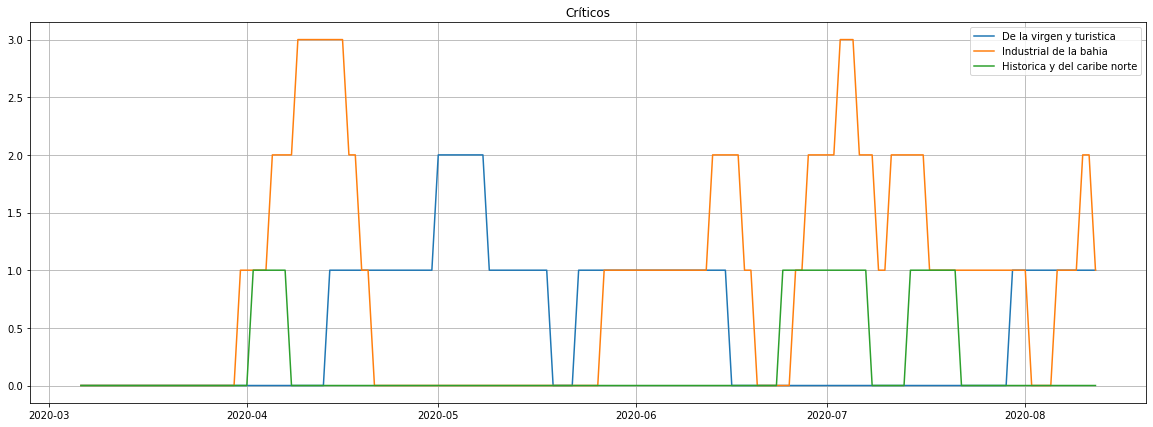

In [31]:
locs = list( all_locs[ 'Localidad' ].unique() )

fig = plt.figure( figsize = ( 20, 7 ) )
for loc in locs:
    current_loc = all_locs[ all_locs[ 'Localidad' ] == loc ]
    plt.plot( current_loc[ 'Fecha' ], current_loc[ 'Críticos' ], label = loc )
plt.title( 'Críticos' )
plt.grid( True )
plt.legend()

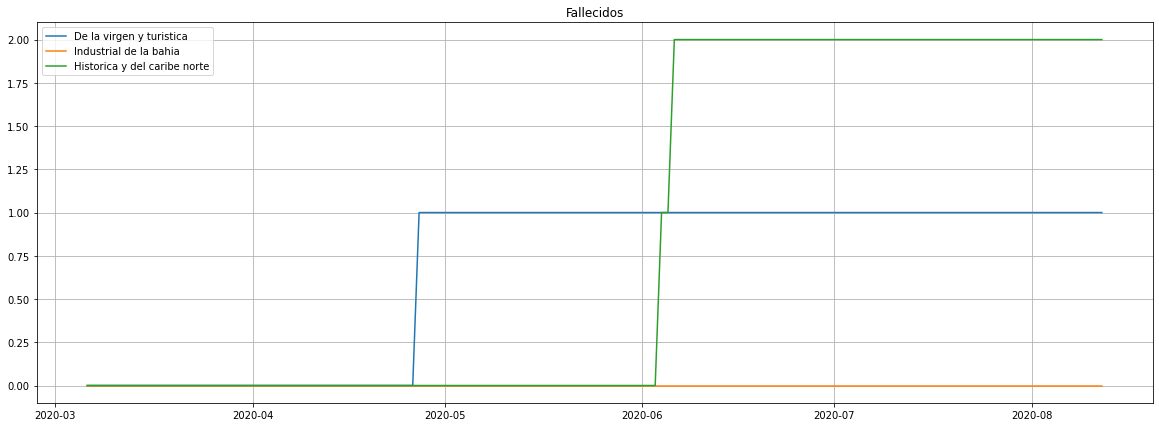

In [32]:
locs = list( all_locs[ 'Localidad' ].unique() )

fig = plt.figure( figsize = ( 20, 7 ) )
for loc in locs:
    current_loc = all_locs[ all_locs[ 'Localidad' ] == loc ]
    pop = ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ).values[ 0 ]
    plt.plot( current_loc[ 'Fecha' ], ( pop - ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ) ), label = loc )
plt.title( 'Fallecidos' )
plt.grid( True )
plt.legend()

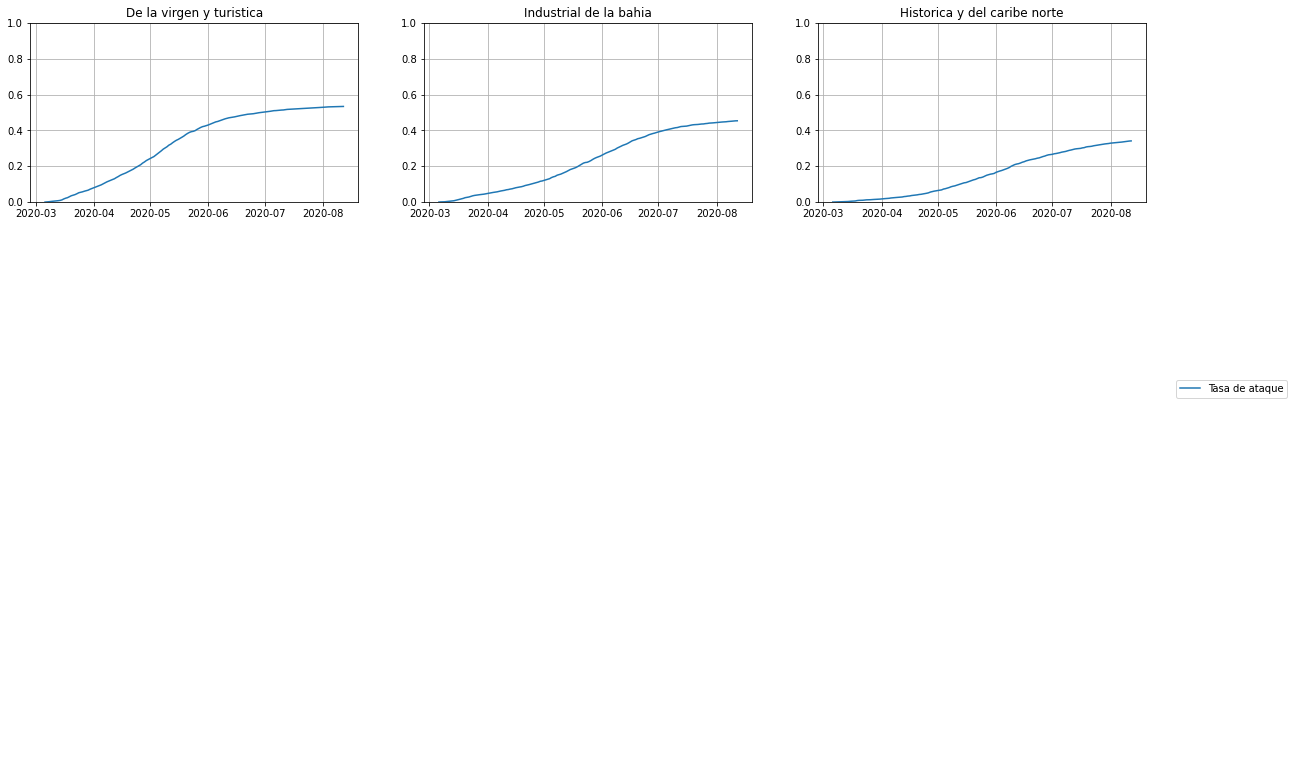

In [33]:
locs = list( all_locs[ 'Localidad' ].unique() )

fig = plt.figure( figsize = ( 20, 27 ) )

for i in range( 1, len( locs ) + 1 ):
    current_loc = all_locs[ all_locs[ 'Localidad' ] == locs[ i - 1 ] ]
    pop = ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ).values[ 0 ]
    plt.subplot( 7, 3, i )
    plt.plot( current_loc[ 'Fecha' ], current_loc[ '?_4' ].cumsum() / pop, label = 'Tasa de ataque' )
    plt.title( locs[ i - 1 ] )
    plt.ylim( [ 0, 1.0 ] )
    plt.grid( True )

fig.legend( labels = [ 'Tasa de ataque' ], loc = 'center right' )

In [34]:
locs = list( all_locs[ 'Localidad' ].unique() )

agents_locs = []
for loc in locs:
    current_loc = all_locs[ all_locs[ 'Localidad' ] == loc ]
    pop = ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ).values[ 0 ]
    
    current_loc[ 'Fallecidos' ] = ( pop - ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ) ) / pop
    current_loc[ 'Graves' ] = current_loc[ 'Graves' ] / pop
    current_loc[ 'Críticos' ] = current_loc[ 'Críticos' ] / pop
    
    
    current_loc = pd.melt( current_loc[ [ 'Fecha', 'Graves', 'Críticos', 'Fallecidos' ] ], id_vars = [ 'Fecha' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] )
    current_loc[ 'Localidad' ] = loc
    agents_locs.append( current_loc )
    
pd.concat( agents_locs ).to_csv( './agents-viz/data/{}-agents-locs2.csv'.format( city ), index = False )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [35]:
locs = list( all_locs[ 'Localidad' ].unique() )

agents_locs = []
for loc in locs:
    current_loc = all_locs[ all_locs[ 'Localidad' ] == loc ]
    pop = ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ).values[ 0 ]
    
    current_loc[ 'R0' ] = current_loc[ '?_4' ].cumsum() / pop
    current_loc[ 'Localidad' ] = loc
    agents_locs.append( current_loc[ [ 'Fecha', 'Localidad', 'R0' ] ] )
    
pd.concat( agents_locs ).to_csv( './agents-viz/data/{}-agents-locs.csv'.format( city ), index = False )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


# By age groups

In [36]:
grupo_edad = { 0: 'Susceptibles', 1: '?_1', 2: '?_2', 3: 'Leves', 4: '?_4', 5: '?_5', 6: 'Graves', 7: '?_7', 8: '?_8', 9: 'Críticos', 10: '?_10', 11: '?_11', 12: 'Recuperados', 13: '?_13', 14: '?_14'  }

In [38]:
age_ranges = {
    'bogota': [ '0-4', '5-19', '20-39', '40-59', '>60' ],
    'cartagena': [ '0-9', '10-19', '20-39', '40-59', '>60' ]
}

In [39]:
def expand_by_age( x ):
    ds = []
    for a in age_ranges[ city ]:
        x[ a ] = json.loads( x[ a ] )
        d = dict()
        d[ 'Grupo de edad' ] = a
        d[ 'Día' ] = row[ 'Día' ]
        for i in range( 15 ):
            d[ grupo_edad[ i ] ] = x[ a ][ i ]
        ds.append( d )
    return ds

all_ages = []
for i, row in agents.iterrows():
    all_ages = all_ages + expand_by_age( row )

all_ages = pd.DataFrame( all_ages )

In [40]:
all_ages[ 'Fecha' ] = all_ages[ 'Día' ].apply( lambda x: pd.to_datetime( '03/06/2020' ) + pd.DateOffset( days = x ) )

In [41]:
all_ages.tail()

,Grupo de edad,Día,Susceptibles,?_1,?_2,Leves,?_4,?_5,Graves,?_7,?_8,Críticos,?_10,?_11,Recuperados,?_13,?_14,Fecha
795,0-9,159,3456,0,0,0,0,0,0,0,0,0,0,0,130,0,0,2020-08-12
796,10-19,159,3226,0,0,11,0,0,0,0,0,0,0,0,374,0,0,2020-08-12
797,20-39,159,2267,0,0,123,5,0,1,0,1,0,0,0,4941,0,32,2020-08-12
798,40-59,159,1568,0,0,82,3,0,2,0,0,1,0,1,3274,0,73,2020-08-12
799,>60,159,1659,0,0,47,2,0,6,0,6,1,0,1,1031,0,52,2020-08-12


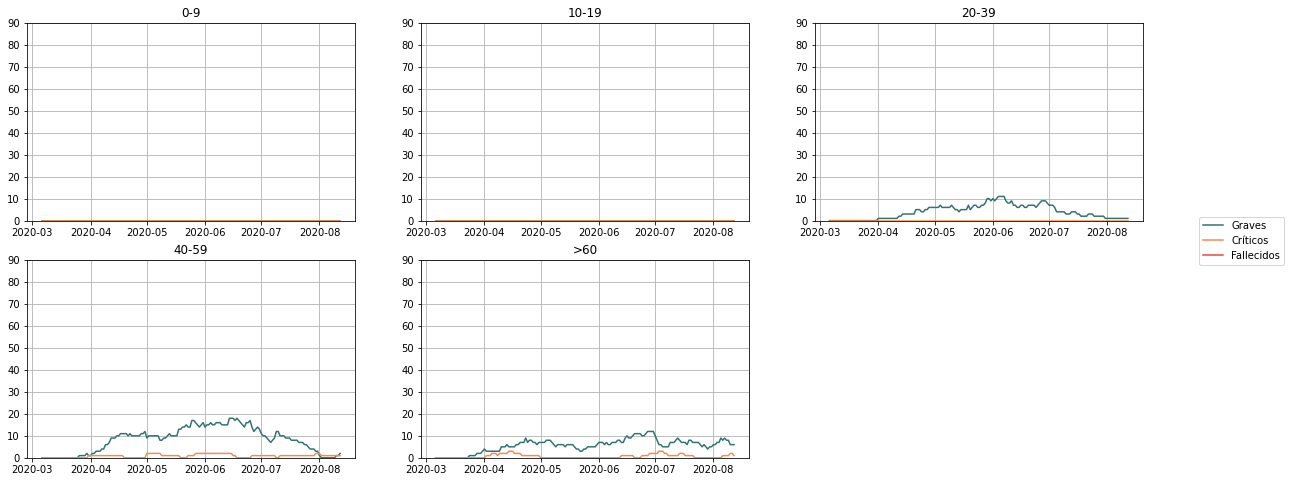

In [42]:
ages = list( all_ages[ 'Grupo de edad' ].unique() )

fig = plt.figure( figsize = ( 20, 8 ) )

for i in range( 1, len( ages ) + 1 ):
    current_age = all_ages[ all_ages[ 'Grupo de edad' ] == ages[ i - 1 ] ]
    plt.subplot( 2, 3, i )
    plt.plot( current_age[ 'Fecha' ], current_age[ 'Graves' ], label = 'Graves', color = '#317372' )
    plt.plot( current_age[ 'Fecha' ], current_age[ 'Críticos' ], label = 'Críticos', color = '#f98a4b' )
    plt.plot( current_age[ 'Fecha' ], ( pop - ( current_age[ 'Susceptibles' ] + current_age[ 'Leves' ] + current_age[ 'Graves' ] + current_age[ 'Críticos' ] + current_age[ 'Recuperados' ] ) ), label = 'Fallecidos', color = '#f64438' )
    plt.title( ages[ i - 1 ] )
    plt.ylim( [ 0, 90 ] )
    plt.grid( True )

fig.legend( labels = [ 'Graves', 'Críticos', 'Fallecidos' ], loc = 'center right' )

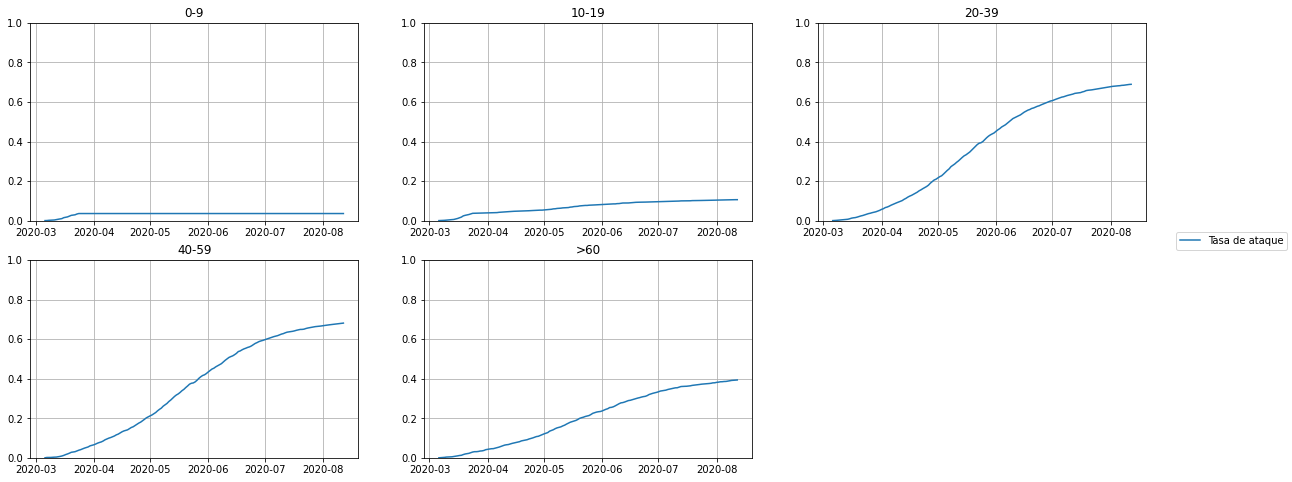

In [43]:
ages = list( all_ages[ 'Grupo de edad' ].unique() )

fig = plt.figure( figsize = ( 20, 8 ) )

for i in range( 1, len( ages ) + 1 ):
    current_age = all_ages[ all_ages[ 'Grupo de edad' ] == ages[ i - 1 ] ]
    pop = ( current_age[ 'Susceptibles' ] + current_age[ 'Leves' ] + current_age[ 'Graves' ] + current_age[ 'Críticos' ] + current_age[ 'Recuperados' ] ).values[ 0 ]
    plt.subplot( 2, 3, i )
    plt.plot( current_age[ 'Fecha' ], current_age[ '?_4' ].cumsum() / pop, label = 'Tasa de ataque' )
    plt.title( ages[ i - 1 ] )
    plt.ylim( [ 0, 1 ] )
    plt.grid( True )

fig.legend( labels = [ 'Tasa de ataque' ], loc = 'center right' )

In [44]:
age = list( all_ages[ 'Grupo de edad' ].unique() )

agents_ages = []
for age in ages:
    current_age = all_ages[ all_ages[ 'Grupo de edad' ] == age]
    pop = ( current_age[ 'Susceptibles' ] + current_age[ 'Leves' ] + current_age[ 'Graves' ] + current_age[ 'Críticos' ] + current_age[ 'Recuperados' ] ).values[ 0 ]
    
    current_age[ 'Fallecidos' ] = ( pop - ( current_age[ 'Susceptibles' ] + current_age[ 'Leves' ] + current_age[ 'Graves' ] + current_age[ 'Críticos' ] + current_age[ 'Recuperados' ] ) ) / pop
    current_age[ 'Graves' ] = current_age[ 'Graves' ] / pop
    current_age[ 'Críticos' ] = current_age[ 'Críticos' ] / pop
    
    
    current_age = pd.melt( current_age[ [ 'Fecha', 'Graves', 'Críticos', 'Fallecidos' ] ], id_vars = [ 'Fecha' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] )
    current_age[ 'Grupo de edad' ] = age
    agents_ages.append( current_age )
    
pd.concat( agents_ages ).to_csv( './agents-viz/data/{}-agents-ages2.csv'.format( city ), index = False )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [ ]:
quarentenas = { 0: 'Susceptibles', 1: 'Leves', 2: 'Graves', 3: 'Críticos', 4: 'Recuperados'  }

In [ ]:
def expand_by_quarintine( x ):
    ds = []
    x[ 'En_cuarentena' ] = json.loads( x[ 'En_cuarentena' ] )
    d = dict()
    d[ 'Día' ] = row[ 'Día' ]
    for i in range( 5 ):
        d[ quarentenas[ i ] ] = x[ 'En_cuarentena' ][ i ]
    ds.append( d )
    return ds

all_quarintines = []
for i, row in agents.iterrows():
    all_quarintines = all_quarintines + expand_by_quarintine( row )

all_quarintines = pd.DataFrame( all_quarintines )

In [ ]:
all_quarintines.tail()

In [ ]:
plt.plot( all_quarintines[ 'Día' ], ( all_quarintines[ 'Susceptibles' ] + all_quarintines[ 'Recuperados' ] + all_quarintines[ 'Leves' ] + all_quarintines[ 'Graves' ] + all_quarintines[ 'Críticos' ] ) )

In [ ]:
del agents[ 'Recuento_zonas' ]
del agents[ '0-4' ]
del agents[ '5-19' ]
del agents[ '20-39' ]
del agents[ '40-59' ]
del agents[ '>60' ]
del agents[ 'En_cuarentena' ]

In [ ]:
agents.tail()

In [ ]:
agents.dtypes

In [ ]:
agents.to_csv( './data/agents/agents_bogota.csv', index = False )